Note: readd sorted top and bottom attached arrays

In [1]:
from prc1_state import State
from prc1 import Prc1
from run_gillespie import run_gillespie_prc1
import numpy as np
import matplotlib.pyplot as plt
from gillespie import run_gillespie
from copy import deepcopy
from gillespie import *
from run_gillespie import *

# microtubule_length, site_spacing, microtubule_offset, spring_constant,
                #  rest_length, k_B_T, microtubule_separation, singly_bound_detachment_rate, k0

In [2]:
microtubule_length = 5000.
site_spacing = 0.2
microtubule_offset = 2000
spring_constant = 2
rest_length = 32
k_B_T = 4.1
microtubule_separation = 32
singly_bound_detachment_rate = 3.2
k0 = 10
params = (microtubule_length, site_spacing, microtubule_offset, spring_constant,
                 rest_length, k_B_T, microtubule_separation, singly_bound_detachment_rate, k0)



In [3]:
state = State(*params)


In [4]:
initial_binding_rate = 2.8
singly_bound_detachment_rate = 4
k0 = 1
end_time = 20
num_prc1, times = run_gillespie_prc1(initial_binding_rate, singly_bound_detachment_rate, k0, end_time)

In [5]:
%timeit run_gillespie_prc1(initial_binding_rate, singly_bound_detachment_rate, k0, end_time)

The slowest run took 5.09 times longer than the fastest. This could mean that an intermediate result is being cached.
177 ms ± 88.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
# test random params for bugs
for _ in range(1000):
    initial_binding_rate, singly_bound_detachment_rate, k0 = 10*np.random.random(3)
    run_gillespie_prc1(initial_binding_rate, singly_bound_detachment_rate, k0, end_time)

In [7]:
# %load_ext line_profiler

In [8]:
# %lprun -f Prc1.double_attachment_rate run_gillespie_prc1(initial_binding_rate, singly_bound_detachment_rate, k0, end_time)

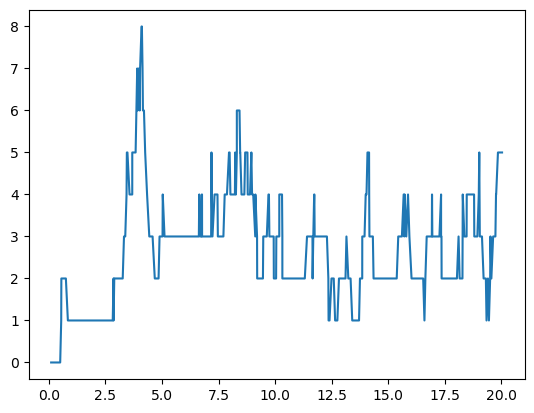

In [9]:
plt.plot(times, num_prc1)